<a href="https://colab.research.google.com/github/ampereapescador/MetodosI_AnaPerea_JuanGomez/blob/main/TAREA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



PUNTO 1

8. Es posible construir una aproximaci´on de orden O(h2) para la derivada progresiva. Para
tal prop´osito, se escribe el polinomio de interpolaci´on de grado 2 para el conjunto soporte Ω = {(x0, f(x0)), (x1, f(x1)), (x2, f(x2))}, y posteriormente se calcula la derivada de este
polinomio.

a) Calcular anal´ıticamente el polinomio que interpola el conjunto soporte.

b) Derivar el polinomio interpolador para encontrar la derivada en el punto x0:
f′(x0) ≈ p′(x0) =
1
2h
(−3f(x0) + 4f(x1) − f(x2)). (4.38)
Si la discretizaci´on es equidistante, tenemos:
f′(x) ∼=
1
2h
(−3f(x) + 4f(x + h) − f(x + 2h)). (4.39)

c) (Python) Para f(x) =
p
tan(x) estimar la derivada progresiva de orden O(h2)
(expresi´on anterior) en el intervalo [0.1, 1.1] con h = 0.01.

d) (Python) Para f(x) =
p
tan(x) estimar la derivada central de orden O(h2) en el
intervalo [0.1, 1.1] con h = 0.01.

e) Calcule anal´ıticamente la derivada de la funci´on f(x), y grafique con la estimaci´on
central y progresiva de orden O(h2).

f) Grafique el error nodal para ambas aproximaciones. ¿Tienen efectivamente el mismo
orden de precisi´on ambos resultados?


PUNTO 2

2. (Theoretical) Compruebe que las funciones cardinales son base (i.e, Li(x) = δij para
cada j ∈ {0, 1, ..., n}).

PUNTO 3

3. ¿Con qu´e grado de exactitud podemos calcular
√
114 mediante la interpolaci´on de de
Lagrange para la funci´on f(x) =
√
x, si elegimos los puntos x0 = 100, x1 = 121, x2 = 144.
Rpta: |E| ≃ 1.8 × 10−3.

In [13]:
# Interpolacion de Lagrange

def lagrange(x, x0, x1, x2, f0, f1, f2):
    # Funciones cardinales
    L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))
    L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))
    L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))


    P2 = f0 * L0 + f1 * L1 + f2 * L2
    return P2

# Funci´on f(x) = √ x
x0= 100
fx0= np.sqrt(x0)

x1= 121
fx1=np.sqrt(x1)

x2= 144
fx2= np.sqrt(x2)

# Punto prueba
x = 114

# Aproximación
aproximacion = lagrange(x, x0, x1, x2, fx0, fx1, fx2)
exact_value = np.sqrt(114)

# Resultado
print(f"Aproximación de √114: {aproximacion}")
print(f"Valor exacto de √114: {exact_value}")

# Error
def third_derivative_sqrt(x):
    # Tercera derivada de sqrt(x): (3/8) * x^(-5/2)
    return (3 / 8) * x**(-2.5)

# Error en x = 114
xi = 114
third_derivative = third_derivative_sqrt(xi)

# Recalculo
product_terms = abs((x - x0) * (x - x1) * (x - x2))
error = abs((third_derivative / 6) * product_terms)

print(f"Estimación del error |E| ≈ {error:.3e}")

Aproximación de √114: 10.675889328063242
Valor exacto de √114: 10.677078252031311
Estimación del error |E| ≈ 1.324e-03


PUNTO 4

4. En el lanzamiento de una bala, una c´amara fotogr´afica registra las siguientes posiciones
en metros respecto al arma homicida (tome ⃗g = −9.8 m/s2 ˆj ):
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/
Parabolico.csv
Estime el vector velocidad inicial, que estar´ıa definido por la magnitud y direcci´on. Rpta:
V0 = 10 m/s y θ = 20◦. Hint: Encuentre el termino lineal y cuadr´atico de la interpolaci´on
y compare con la ecuaci´on de trayectoria de la bala.

In [23]:
# Lectura CSV

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv"
data = pd.read_csv(url)

# Cordenadas

x = data['X'].values
y = data['Y'].values

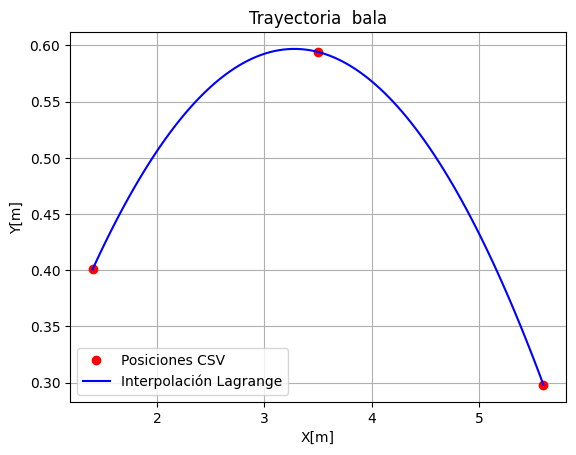

Velocidad inicial V0 = 10.00 [m/s]
Ángulo de lanzamiento θ = 20.00°


In [48]:
# Interpolación de Lagrange- polinomio

def lagrange(x0, x, y):

    n = len(x)
    total = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (x0 - x[j]) / (x[i] - x[j])
        total += term
    return total

# Ajustar la interpolación de Lagrange en los puntos de trayectoria
x_interpolado = np.linspace(min(x), max(x), 100)
y_interpolado = [lagrange(xi, x, y) for xi in x_interpolado]

# Ploteo de puntos originales y la interpolación. Generado con ayuda de GPT
plt.plot(x, y, 'ro', label='Posiciones CSV')
plt.plot(x_interpolado, y_interpolado, 'b-', label='Interpolación Lagrange')
plt.xlabel('X[m]')
plt.ylabel('Y[m]')
plt.title('Trayectoria  bala')
plt.legend()
plt.grid()
plt.show()

# Ajuste
coeficientes = np.polyfit(x, y, 2)
a, b, c = coeficientes


# Cuadratica general vs ecuacion fisica  y = a*x^2 + b*x + c ;  y = x*tan(theta) - (g/(2*V0^2*cos(theta)^2))*x^2

# Calculo theta
# b= tan(theta)

theta_estimate = np.arctan(b)
theta_deg = np.degrees(theta_estimate)

# Calculo V0 a partir del término cuadrático

g = -9.8  #[m/s^2]
V0 = np.sqrt(abs(-g / (2 * a * np.cos(theta_estimate)**2)))

print(f"Velocidad inicial V0 = {V0:.2f} [m/s]")
print(f"Ángulo de lanzamiento θ = {theta_deg:.2f}°")